# Playing with some real trees and data

In this demo, we'll load a real tree and data, both kindly provided by Rebecca Stubbs. The tree is a phylogeny of the Micranthes and the data are...Stubbs will need to let us know!!

Let's import and go...

In [28]:
from ete3 import Tree, TreeStyle, NodeStyle, TextFace, ClusterTree
import pandas as pd
import os


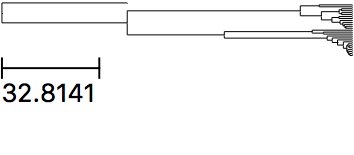

In [65]:
# Load the tree in to a ClusterTree for plotting heatmap
dataPath="data"
t=ClusterTree(os.path.join(dataPath,"introns_rmsn100_nodups_partition.pruned.nwk"))
t.render("%%inline", w=100, units="mm")

In [82]:
# Read the data matrix into a string
# Note, can't use a pandas dataframe here unfortunately.
with open(os.path.join(dataPath,"RMSN_geog_DATA_raxml.ete.txt"), 'r') as file:
    data=file.read()

In [83]:
# Look at matrix
print(data)

#Names	A	R	S	C	P
Micranthes_apetala_61	0	1	0	1	0
Micranthes_bryophora_114	0	0	1	0	0
Micranthes_bryophora_66	0	0	1	0	0
Micranthes_bryophora_90	0	1	0	0	0
Micranthes_bryophora_JS01RS	0	1	0	0	0
Micranthes_bryophora_JS02RS	0	1	0	0	0
Micranthes_bryophora_JS03RS	0	1	0	0	0
Micranthes_bryophora_JS04RS	0	1	0	0	0
Micranthes_bryophora_JS06RS	0	1	0	0	0
Micranthes_ferruginea_87	0	1	1	1	0
Micranthes_laciniata_107	1	0	0	0	0
Micranthes_merkii_H8	1	0	0	0	0
Micranthes_merkii_rf	1	0	0	0	0
Micranthes_oregana_77	0	1	1	1	0
Micranthes_petiolaris_38	0	0	0	0	1
Micranthes_rhomboidea_42	0	1	0	0	0
Micranthes_tolmiei_111	0	0	1	0	0
Micranthes_tolmiei_112	0	0	1	0	0
Micranthes_tolmiei_113	0	0	1	0	0
Micranthes_tolmiei_115	0	0	1	0	0
Micranthes_tolmiei_166	0	0	0	1	0
Micranthes_tolmiei_67	0	0	0	1	0
Micranthes_tolmiei_74	0	1	0	0	0
Micranthes_tolmiei_88	0	1	0	0	0
Micranthes_tolmiei_CD10Rs	0	1	0	0	0
Micranthes_tolmiei_H3	0	0	0	1	0
Micranthes_tolmiei_JS13	0	1	0	0	0
Chrysosplenium_album_rf	1	0	0	0	0



In [84]:
# Link the matrix to the tree
t.link_to_arraytable(data)

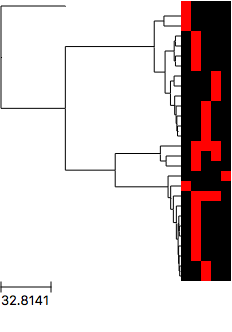

In [85]:
# Render the tree with a heatmap
# Maybe not what we wanted, but a demo.
t.render("%%inline", "heatmap")

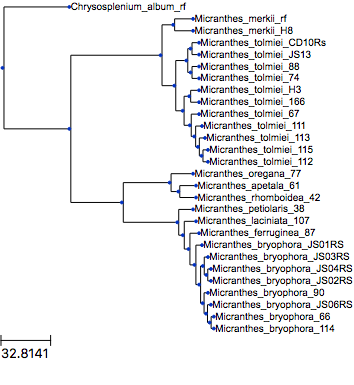

In [86]:
# Let's try again, reading the tree in to a Tree and using data to color branches.
t=Tree(os.path.join(dataPath,"introns_rmsn100_nodups_partition.pruned.nwk"))
t.render("%%inline", w=100, units="mm")


In [100]:
# Let's use a pandas dataframe this time for the matrix

data = pd.read_csv(os.path.join(dataPath,"RMSN_geog_DATA_raxml.ete.txt"),
                   sep="\t", index_col=0)
data.head()

,A,R,S,C,P
#Names,,,,,
Micranthes_apetala_61,0,1,0,1,0
Micranthes_bryophora_114,0,0,1,0,0
Micranthes_bryophora_66,0,0,1,0,0
Micranthes_bryophora_90,0,1,0,0,0
Micranthes_bryophora_JS01RS,0,1,0,0,0


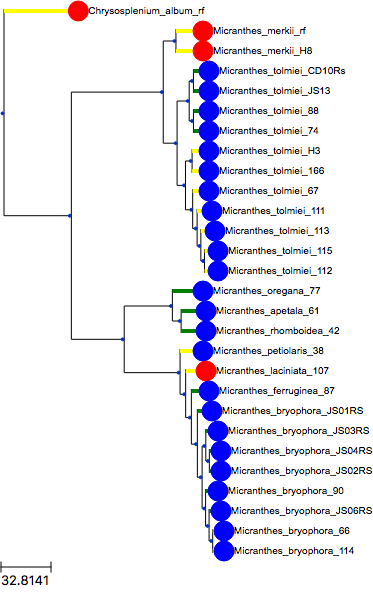

In [104]:
# Traverse the tree and set some colors
for n in t.traverse():
    if n.is_leaf(): #if the node is a leaf

        #Use col A to set color of ball: Blue (0) or Red (1)
        if data.A[n.name]==0:
            n.img_style["fgcolor"] = "blue" #And set that node style for the node
            n.img_style["size"] = 20
        elif data.A[n.name]==1:
            n.img_style["fgcolor"] = "red" #And set that node style for the node
            n.img_style["size"] = 20
 
        #Use col R to set branch color: Yellow (0) or Green (1)
        if data.R[n.name]==0:
            n.img_style["vt_line_color"] = "yellow"
            n.img_style["hz_line_color"] = "yellow"
            n.img_style["vt_line_width"] = 4
            n.img_style["hz_line_width"] = 4
        elif data.R[n.name]==1:
            n.img_style["vt_line_color"] = "green"
            n.img_style["hz_line_color"] = "green"
            n.img_style["vt_line_width"] = 4
            n.img_style["hz_line_width"] = 4
 
        
t.render("%%inline")